<a href="https://colab.research.google.com/github/MohammadHeydari/DataScience/blob/master/Amir_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

#covid19 = pd.read_csv('https://github.com/nytimes/covid-19-data/blob/master/us-states.csv', sep='\t', error_bad_lines=False)
covid19_states = pd.read_csv('us-states.csv')
covid19_counties = pd.read_csv('us-counties.csv')

In [32]:
from google.colab import files
up = files.upload()

Saving us-counties.csv to us-counties.csv
Saving us-states.csv to us-states.csv


In [39]:
covid19_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [68]:
death_by_state = covid19_states.groupby('state')[['cases']].sum().reset_index()
death_by_state

,state,cases
0,Alabama,20216
1,Alaska,2273
2,Arizona,23700
3,Arkansas,10611
4,California,170961
5,Colorado,55639
6,Connecticut,61321
7,Delaware,7191
8,District of Columbia,10962
9,Florida,130541


In [59]:
covid19_states.describe()

,fips,cases,deaths
count,2049.000000,2049.000000,2049.000000
mean,30.954124,1792.103953,45.832601
std,18.099142,8698.466106,282.313615
min,1.000000,1.000000,0.000000
25%,17.000000,8.000000,0.000000
50%,31.000000,95.000000,1.000000
75%,46.000000,719.000000,13.000000
max,78.000000,149401.000000,6268.000000


In [58]:
#تعداد مرگ و میر به صورت نزولی
covid19_states['deaths'].value_counts()

0       951
1       154
2        92
3        71
4        49
       ... 
91        1
89        1
77        1
71        1
1550      1
Name: deaths, Length: 232, dtype: int64

In [55]:
death_by_date = covid19_states.groupby('date')[['fips']].sum()
#ascending
#رو فالس قرار میدیم تا تعداد رو بر اساس بیشترین تا کمترین مرتب سازی کنه
#و 30 تای اول رو می گیریم
death_by_date.sort_values('fips', ascending=False)[:30]

,fips
date,
2020-04-08,1762
2020-04-02,1762
2020-03-28,1762
2020-03-29,1762
2020-03-30,1762
2020-03-31,1762
2020-04-01,1762
2020-04-03,1762
2020-04-04,1762


In [46]:
#اسم شهرها بدون تکرار
covid19_states['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [40]:
covid19_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [60]:
covid19_counties.describe()

,fips,cases,deaths
count,42687.000000,43285.000000,43285.000000
mean,29411.165015,84.822456,2.152339
std,15582.082125,1082.634354,42.730598
min,1001.000000,0.000000,0.000000
25%,17119.000000,2.000000,0.000000
50%,28121.000000,5.000000,0.000000
75%,42109.000000,18.000000,0.000000
max,56043.000000,81803.000000,4571.000000


In [66]:
death_by_state = covid19_states.groupby('state')[['deaths']].sum().reset_index()
death_by_state

,state,deaths
0,Alabama,412
1,Alaska,33
2,Arizona,564
3,Arkansas,152
4,California,3856
5,Colorado,1417
6,Connecticut,1784
7,Delaware,146
8,District of Columbia,198
9,Florida,2183


In [56]:
#اسم استانها بدون تکرار
covid19_counties['county'].unique()

array(['Snohomish', 'Cook', 'Orange', ..., 'Dickens', 'Frio', 'Braxton'],
      dtype=object)

In [41]:
covid19_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43285 entries, 0 to 43284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    43285 non-null  object 
 1   county  43285 non-null  object 
 2   state   43285 non-null  object 
 3   fips    42687 non-null  float64
 4   cases   43285 non-null  int64  
 5   deaths  43285 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [42]:
covid19_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43285 entries, 0 to 43284
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    43285 non-null  object 
 1   county  43285 non-null  object 
 2   state   43285 non-null  object 
 3   fips    42687 non-null  float64
 4   cases   43285 non-null  int64  
 5   deaths  43285 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [43]:
#do we have null value?
pd.isnull(covid19_counties).any()

date      False
county    False
state     False
fips       True
cases     False
deaths    False
dtype: bool

In [44]:
pd.isnull(covid19_states).any()

date      False
state     False
fips      False
cases     False
deaths    False
dtype: bool

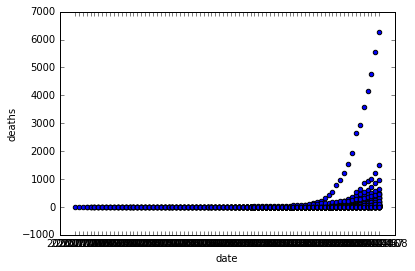

In [70]:
covid19_states.plot(kind='scatter', x='date', y='deaths')